In [2]:
from plumbum.cmd import grep, awk
import pickle, os, shutil
from glob import glob
import numpy as np
from joblib import Parallel, delayed
import pandas as pd
from math import sin, cos, pi
from tqdm.notebook import tqdm
# Geom manipulate
from AaronTools.geometry import Geometry
from tqdm import tqdm
from time import perf_counter
import seaborn as sns

In [23]:
energies = []
for path_check in sorted(glob("*/*output")):
    rad = os.path.basename(os.path.dirname(path_check))
    try:
        hf=float((grep['-i', '::    Total SCF energy',path_check] | awk['{print $NF }'])().strip())
        
        corr=(grep['-i', 'E2 (Variational):',path_check] | awk['{print $NF }'])().strip().split('\n')
        rasscf=(grep['-i', '::    RASSCF',path_check] | awk['{print $NF }'])().strip().split('\n')
        caspt2=(grep['-i', '::    CASPT2',path_check] | awk['{print $NF }'])().strip().split('\n')
        energies.append((rad,hf,corr,rasscf,caspt2))
    except:
        continue

In [38]:
columns =['radius', 'HF',"Ecorr1","Ecorr2","Ecorr3","CASSCF1","CASSCF2","CASSCF3","CASPT2_1","CASPT2_2","CASPT2_3"]

In [60]:
df = pd.DataFrame(np.array([np.hstack([r,i,j,k,l]) for r,i,j,k,l in energies]),columns=columns).astype(float)

In [65]:
df.iloc[:,1:] = df.iloc[:,1:] - df.iloc[-1,1:]

<Axes: xlabel='radius', ylabel='Energies'>

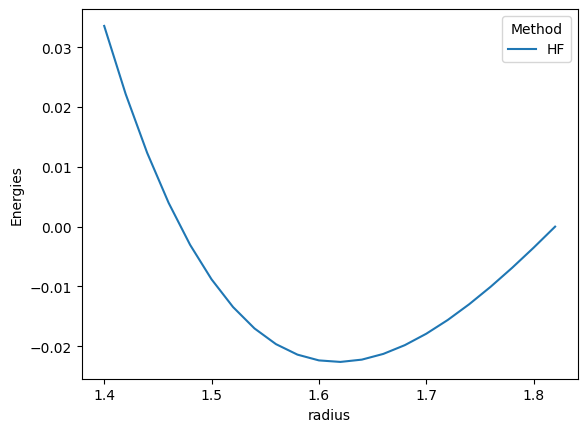

In [68]:
melteddf =df.astype(float).melt(id_vars=['radius'],value_vars=["HF"],value_name='Energies',var_name='Method')
sns.lineplot(data=melteddf,x='radius',y='Energies',hue='Method')